<a href="https://colab.research.google.com/github/sadidoll/Artifical-Interlligence/blob/master/Homework_1(Machine%20Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd 

Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [86]:
import numpy as np
import pandas as pd
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
combine = [train_df, test_df]

### Features in the training set: 

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Distribution of numerical feature values across the samples for Q7:

In [8]:
train_df.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Distribution of categorial feature values across the samples for Q8:

In [8]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",male,1601,B96 B98,S
freq,1,577,7,4,644


### Plot to visualize the if the Pclass has any correlation with Survived(Q9):

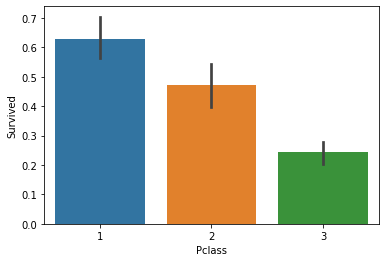

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [27]:
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Pclass', ascending=True)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Plot to visualize the if females were more likely to have Survived(Q10):

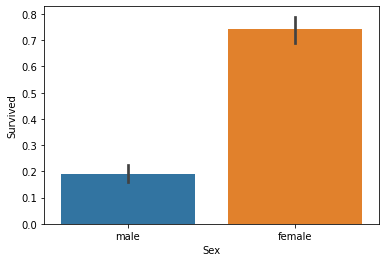

In [47]:
sns.barplot(x='Sex', y='Survived', data=train_df)

In [48]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Histogram between Ages and Survived for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns(Q11):

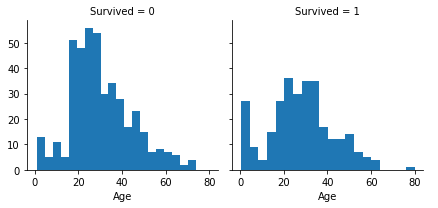

In [49]:
grid = sns.FacetGrid(train_df, col='Survived', height= 3, aspect=1)
grid.map(plt.hist, 'Age',bins = 20)
grid.add_legend();

### Histograms plot for identifying correlations of the three features(Age, Pclass and Survived) for Q12:

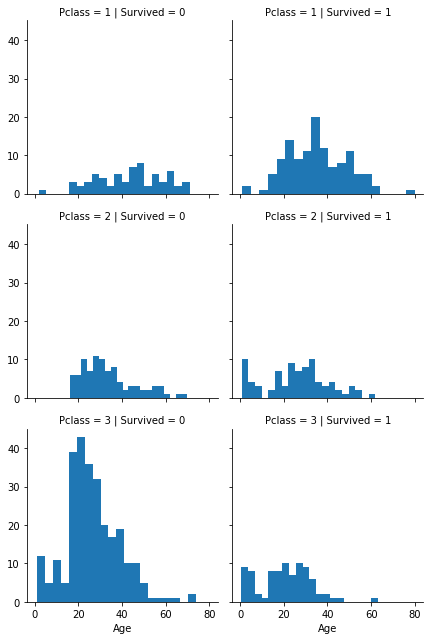

In [64]:
grid = sns.FacetGrid(train_df, row ='Pclass',col='Survived', height= 3, aspect=1)
grid.map(plt.hist, 'Age',bins = 20, alpha=1)
grid.add_legend();

### Bar plot to illustrate the correlations of Embarked, Sex, Fare, and Survivied(Q13):

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


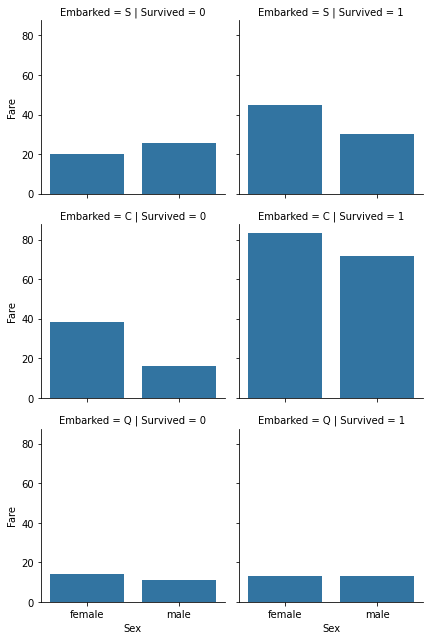

In [97]:
grid = sns.FacetGrid(train_df, row ='Embarked',col='Survived', height= 3)
grid.map(sns.barplot, 'Sex', 'Fare', ci = None)
grid.add_legend();

### To check the null values of Cabin feature in test dataset(Q15):

In [40]:
test_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Smyth, Miss. Julia",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Coverting Sex feature to a new feature called Gender where female=1 and male=0 (Q16). 

In [73]:
gender = {'female': 1,'male': 0}
data = [train_df]

for dataset in data:
    dataset['Gender'] = dataset['Sex'].map(gender).astype(int)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


### A simple way is to generate random numbers between mean and standard deviation for estimating and completing features with missing or null values. We will first do this for the Age feature(Q17):

In [78]:
data_age = [train_df]
for dataset_age in data_age:
    for i in range (0, len(dataset_age)):
        if np.isnan(dataset_age["Age"][i]) == True:
            dataset_age["Age"][i] = np.random.uniform(high=dataset_age['Age'].median(),low=dataset_age['Age'].std())
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,18.635996,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


### Complete a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. Please simply fill these with the most common occurrences(Q18):

In [79]:
data_embark = [train_df]
embark_most_occurence = train_df.Embarked.describe().top
## Fill in the incomplete values 
for d in data_embark:
  d['Embarked'] = d['Embarked'].fillna(embark_most_occurence)
train_df.head(63)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,1
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,0
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,0
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,S,1


### Descriptive Statistice of the test dataset:

In [80]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


To find the mode in the Fare feature:

In [81]:
test_df.Fare.mode()

0    7.75
dtype: float64

### Filling the single missing value of the Fare feature in the test data set using the mode to get the value for the most frequently occuring value for the Fare feature(Q19):

In [82]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].dropna().mode()[0])
test_df.head(155)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
150,1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C
151,1043,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.7500,NaN,S
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S


## The descriptive statistics of the test dataset after filling single value for the Feature, before filling the missing value Fare feature had a count of 417(can be seen two cells above) and now its 418 that means all the values have been filled:

In [83]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.857145
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### A new feature FareBand(Q20):

In [84]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,18.635996,0,0,330877,8.4583,NaN,Q,0,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,1,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1,"(14.454, 31.0]"


In [85]:
data_fareband = [train_df]
for dataset in data_fareband:
    dataset.loc[ dataset['Fare'] < 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] >= 7.91) & (dataset['Fare'] < 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] >= 14.454) & (dataset['Fare'] < 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] >= 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
 
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,0,NaN,S,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,3,C85,C,1,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,1,NaN,S,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,3,C123,S,1,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,1,NaN,S,0,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",male,18.635996,0,0,330877,1,NaN,Q,0,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,3,E46,S,0,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,2,NaN,S,0,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,1,NaN,S,1,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,2,NaN,C,1,"(14.454, 31.0]"
